
# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

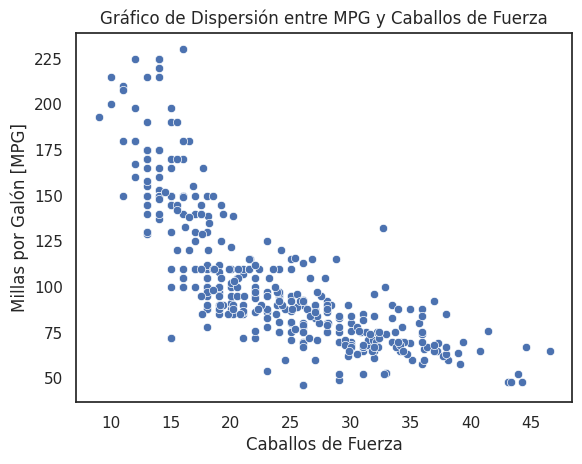

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos "auto mpg"
auto_data = sns.load_dataset("mpg")

# Crear un gráfico de dispersión
sns.scatterplot(x="mpg", y="horsepower", data=auto_data)

# Personalizar el gráfico (opcional)
plt.title("Gráfico de Dispersión entre MPG y Caballos de Fuerza")
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Millas por Galón [MPG]")


# Mostrar el gráfico
plt.show()

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<ipython-input-24-f71f50fd27b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = auto_data.corr()


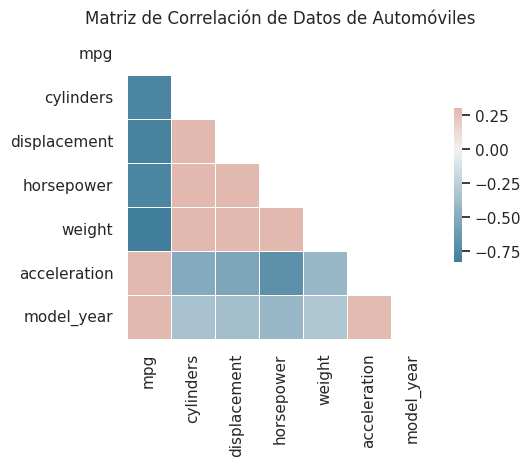

In [ ]:
# Calcular la matriz de correlación
corr = auto_data.corr()

# Generar una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de Matplotlib
f, ax = plt.subplots(figsize=(5, 4)) #figsize=(11, 9)

# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Personalizar el título (opcional)
plt.title("Matriz de Correlación de Datos de Automóviles")

# Mostrar el gráfico
plt.show()

3) (1 punto) Construir y entrenar un modelo de regresion lineal


Error cuadrático medio (MSE): 19.151211313552405
Coeficiente de determinación (R^2): 0.6438073642623536


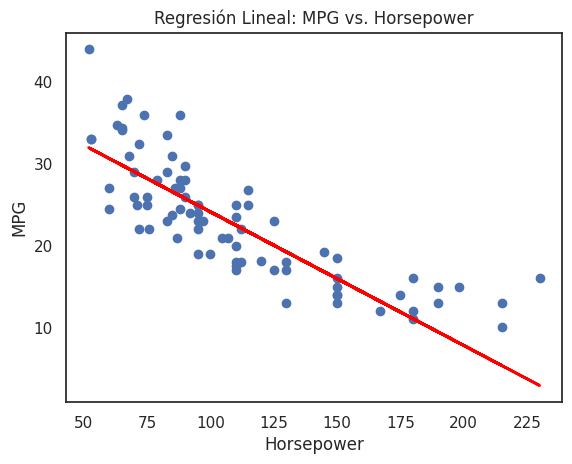

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Cargar el conjunto de datos "auto mpg"
auto_data = sns.load_dataset("mpg")

# Seleccionar la variable "mpg" como la variable objetivo (y) y "horsepower" como la característica (X)
X = auto_data[["horsepower"]]
y = auto_data["mpg"]

# Comprobar y tratar los valores faltantes
if X.isnull().any().any() or y.isnull().any():
    # Si hay valores faltantes en X o y, usar SimpleImputer para rellenarlos con la media
    imputer = SimpleImputer(strategy="mean")
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).ravel())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Visualizar el ajuste del modelo
plt.scatter(X_test, y_test) #, color="blue"
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.title("Regresión Lineal: MPG vs. Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

- Error Cuadrático Medio (MSE): El Error Cuadrático Medio es una medida que evalúa cuán cerca están las predicciones del modelo de los valores reales. Cuanto más bajo sea el valor de MSE, mejor será el modelo. Se calcula como la suma de los cuadrados de las diferencias entre las predicciones y los valores reales, dividida por el número de observaciones.

- Coeficiente de Determinación ($R^2$): El coeficiente de determinación, o $R^2$, mide la proporción de la varianza en la variable objetivo que es explicada por el modelo. Un valor de $R^2$ cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos, mientras que un valor cercano a 0 significa que el modelo no explica casi nada.

- Error Absoluto Medio (MAE): El Error Absoluto Medio mide el valor absoluto de las diferencias entre las predicciones y los valores reales. Proporciona una idea de cuán lejos están las predicciones del modelo en promedio de los valores reales.

- Error Porcentual Absoluto Medio (MAPE): El Error Porcentual Absoluto Medio mide el error absoluto promedio como un porcentaje de los valores reales. Es útil para entender el error en términos relativos.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE (si es necesario)
mape = (np.abs(y_test - y_pred) / np.abs(y_test)).mean() * 100

# Imprimir las estadísticas de desempeño
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)
print("Error Absoluto Medio (MAE):", mae)
print("Error Porcentual Absoluto Medio (MAPE):", mape)

Error Cuadrático Medio (MSE): 19.151211313552405
Coeficiente de Determinación (R^2): 0.6438073642623536
Error Absoluto Medio (MAE): 3.4834646156800146
Error Porcentual Absoluto Medio (MAPE): 16.401767199251754


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


<ipython-input-46-8c35cfe4a421>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = auto_data.corr()


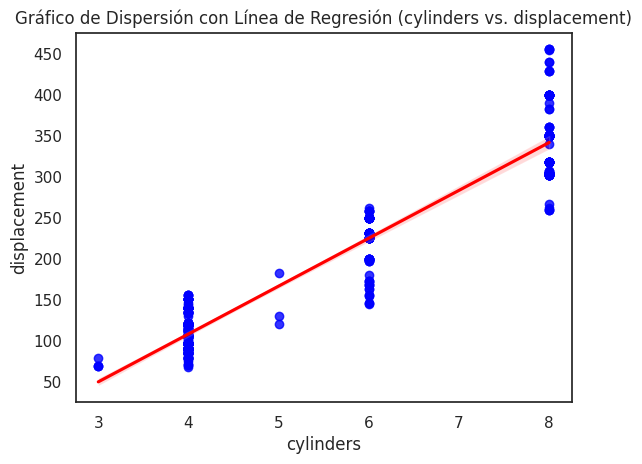

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos "auto mpg"
auto_data = sns.load_dataset("mpg")

# Calcular la matriz de correlación
corr_matrix = auto_data.corr()

# Encontrar la pareja de variables más correlacionadas (excluyendo la correlación de una variable consigo misma)
max_correlation = 0
most_correlated_pair = ()
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > max_correlation:
            max_correlation = abs(corr_matrix.loc[col1, col2])
            most_correlated_pair = (col1, col2)

# Obtener las variables más correlacionadas
var1, var2 = most_correlated_pair

# Utilizar sns.regplot para trazar un gráfico de dispersión con la línea de regresión para las variables más correlacionadas
sns.regplot(x=var1, y=var2, data=auto_data, color="blue", line_kws={"color": "red"})

# Personalizar el gráfico (opcional)
plt.title(f"Gráfico de Dispersión con Línea de Regresión ({var1} vs. {var2})")
plt.xlabel(var1)
plt.ylabel(var2)

# Mostrar el gráfico
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.